In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import json
from config import api_key

In [2]:
#setting up API url to get the price

url = "http://api.eia.gov/series/?api_key="

elect_qua_price_df = pd.DataFrame(columns = ["State","2020 price","2019 price","2018 price","2017 price","2016 price","2015 price"])
elect_qua_sales_df = pd.DataFrame(columns = ["State","2020 so far sales","2019 sales","2018 sales","2017 sales","2016 sales","2015 sales"])
states = ["AL","AK","AZ", "AR","CA","CO","CT", "DE","FL","GA", "HI", "ID", "IL","IN", "IA","KS", "KY","LA","ME","MD",
          "MA","MI","MN", "MS","MO","MT", "NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD",
          "TN","TX","UT","VT","VA","WA","WV","WI","WY"]

#looping through the call to get information calling API calling for price
for states in states:
    elec_df_q = requests.get(url+ api_key +"&series_id=ELEC.PRICE."+states+"-ALL.Q").json()
    Q1 = elec_df_q['series'][0]['data'][1][1]
    Q2 = elec_df_q['series'][0]['data'][0][1]
    elec_df_y = requests.get(url+ api_key +"&series_id=ELEC.PRICE."+states+"-ALL.A").json()
    yr_2020 = round((Q1+Q2)/2,2)
    new_row_df = {"State": states,"2020 price":yr_2020 ,
               "2019 price":elec_df_y['series'][0]['data'][0][1],
               "2018 price":elec_df_y['series'][0]['data'][1][1],
               "2017 price":elec_df_y['series'][0]['data'][2][1],
               "2016 price":elec_df_y['series'][0]['data'][3][1],
               "2015 price":elec_df_y['series'][0]['data'][4][1]
                 }
    elect_qua_price_df = elect_qua_price_df.append(new_row_df, ignore_index=True)
    elec_df_new = requests.get(url+ api_key +"&series_id=ELEC.SALES."+states+"-ALL.Q").json()
    Q1_s = elec_df_new['series'][0]['data'][1][1]
    Q2_s = elec_df_new['series'][0]['data'][0][1]
    elec_df_y_s = requests.get(url+ api_key +"&series_id=ELEC.SALES."+states+"-ALL.A").json()
    yr_2020_s = (Q2_s+Q1_s)
    new_row_df = {"State": states,"2020 so far sales":yr_2020_s ,
               "2019 sales":elec_df_y_s['series'][0]['data'][0][1],
               "2018 sales":elec_df_y_s['series'][0]['data'][1][1],
               "2017 sales":elec_df_y_s['series'][0]['data'][2][1],
               "2016 sales":elec_df_y_s['series'][0]['data'][3][1],
               "2015 sales":elec_df_y_s['series'][0]['data'][4][1]
                 }
    elect_qua_sales_df = elect_qua_sales_df.append(new_row_df, ignore_index=True)


elect_qua_price_df.head(25)


,State,2020 price,2019 price,2018 price,2017 price,2016 price,2015 price
0,AL,9.73,9.88,9.63,9.83,9.56,9.33
1,AK,20.15,20.43,19.36,19.10,17.93,17.59
2,AZ,10.30,10.64,10.85,10.64,10.33,10.34
3,AR,8.09,8.13,7.78,8.26,8.13,8.19
4,CA,17.03,17.04,16.58,16.06,15.23,15.42
5,CO,9.93,10.02,10.02,9.99,9.83,9.94
6,CT,19.51,18.75,18.41,17.55,17.24,17.77
7,DE,10.62,10.64,10.55,10.90,11.09,11.17
8,FL,10.12,10.70,10.32,10.42,9.91,10.49
9,GA,9.51,9.53,9.62,9.83,9.59,9.62


In [3]:
elect_qua_sales_df.head(25)

,State,2020 so far sales,2019 sales,2018 sales,2017 sales,2016 sales,2015 sales
0,AL,39555.42529,87734.82971,90280.45601,86241.73002,88225.14099,88845.54301
1,AK,3004.94888,5840.97456,5972.46697,6185.79900,6123.20203,6159.20400
2,AZ,36209.02713,77720.38750,78346.30198,77646.26201,78237.82802,77349.41596
3,AR,21469.48132,47916.95892,49602.70799,46085.95101,46188.43801,46465.15401
4,CA,112830.38146,247679.77249,255224.27196,257267.93701,256846.63497,261170.43698
5,CO,26800.34199,56271.64572,56450.48002,54830.18600,54802.03701,54116.04599
6,CT,12831.14497,27754.65181,28833.92499,28135.52999,28931.08701,29476.15502
7,DE,5165.81757,11236.91617,11773.09999,11128.60301,11258.43802,11498.20500
8,FL,110212.47264,237728.48947,238565.39101,233154.54901,235721.82202,235599.39799
9,GA,62055.90270,138087.81610,139866.07398,133456.62002,138112.23899,135878.21498


In [4]:
elec_sales_price_df = pd.merge(elect_qua_price_df, elect_qua_sales_df, on = ['State'], how = 'outer')
elec_sales_price_df = elec_sales_price_df.rename({'State': 'State Abbreviation'}, axis='columns')

elec_sales_price_df.head()

,State Abbreviation,2020 price,2019 price,2018 price,2017 price,2016 price,2015 price,2020 so far sales,2019 sales,2018 sales,2017 sales,2016 sales,2015 sales
0,AL,9.73,9.88,9.63,9.83,9.56,9.33,39555.42529,87734.82971,90280.45601,86241.73002,88225.14099,88845.54301
1,AK,20.15,20.43,19.36,19.10,17.93,17.59,3004.94888,5840.97456,5972.46697,6185.79900,6123.20203,6159.20400
2,AZ,10.30,10.64,10.85,10.64,10.33,10.34,36209.02713,77720.38750,78346.30198,77646.26201,78237.82802,77349.41596
3,AR,8.09,8.13,7.78,8.26,8.13,8.19,21469.48132,47916.95892,49602.70799,46085.95101,46188.43801,46465.15401
4,CA,17.03,17.04,16.58,16.06,15.23,15.42,112830.38146,247679.77249,255224.27196,257267.93701,256846.63497,261170.43698


In [5]:
#path_to_file = os.path.join("data","CostOfLiving.csv")
#cost_df = pd.read_csv(path_to_file)
#cost_df.head(51)


In [6]:
#state_group = cost_df.groupby('State')
#state_price = state_group['costIndex'].mean()
#state_price

In [7]:
#plt.figure(figsize=(15,6))
#state_price = state_price.sort_values(ascending=False)
#cost_chart = state_price.plot(kind='bar')
#cost_chart.set_xlabel("State")
#cost_chart.set_ylabel("Cost Index Price (USD)")

#plt.show()

In [8]:
taxes_path = os.path.join( "data","State_Local_Sales_Taxes_2020_July_2.csv")
State_Taxes = pd.read_csv(taxes_path, encoding='latin1')
State_Taxes.head()


,State w/ Notes,State,Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate
0,Ala.,Alabama,AL,0.0400,40.0,0.0522,0.0922,5.0,0.07500
1,Alaska,Alaska,AK,0.0000,46.0,0.0176,0.0176,46.0,0.07500
2,Ariz.,Arizona,AZ,0.0560,28.0,0.0280,0.0840,11.0,0.05600
3,Ark.,Arkansas,AR,0.0650,9.0,0.0303,0.0953,2.0,0.05125
4,Calif. (b),California,CA,0.0725,1.0,0.0143,0.0868,8.0,0.02500


In [9]:
pop_path = os.path.join("data","pop_density.csv")
State_Pop = pd.read_csv(pop_path, encoding='latin1')
State_Pop.head()

,STATE_OR_REGION,Abbreviation,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,US,92228531.0,106021568.0,123202660.0,132165129.0,151325798.0,179323175.0,203211926.0,226545805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,AL,2138093.0,2348174.0,2646248.0,2832961.0,3061743.0,3266740.0,3444165.0,3893888.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
2,Alaska,AK,64356.0,55036.0,59278.0,72524.0,128643.0,226167.0,300382.0,401851.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
3,Arizona,AZ,204354.0,334162.0,435573.0,499261.0,749587.0,1302161.0,1770900.0,2718215.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
4,Arkansas,AR,1574449.0,1752204.0,1854482.0,1949387.0,1909511.0,1786272.0,1923295.0,2286435.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0


In [10]:
State_Taxes = State_Taxes.drop(['State w/ Notes'], axis=1)
State_Taxes.head(51)

,State,Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate
0,Alabama,AL,0.04000,40.0,0.0522,0.0922,5.0,0.07500
1,Alaska,AK,0.00000,46.0,0.0176,0.0176,46.0,0.07500
2,Arizona,AZ,0.05600,28.0,0.0280,0.0840,11.0,0.05600
3,Arkansas,AR,0.06500,9.0,0.0303,0.0953,2.0,0.05125
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500
5,Colorado,CO,0.02900,45.0,0.0475,0.0765,16.0,0.08300
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000
8,District of Columbia,DC,0.06000,-17.0,0.0000,0.0600,-38.0,0.00000
9,Florida,FL,0.06000,17.0,0.0105,0.0705,23.0,0.02500


In [11]:
State_Pop = State_Pop.rename({'STATE_OR_REGION': 'State'}, axis='columns')
State_Pop.head(50)

,State,Abbreviation,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,United States,US,92228531.0,106021568.0,123202660.0,132165129.0,151325798.0,179323175.0,203211926.0,226545805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,AL,2138093.0,2348174.0,2646248.0,2832961.0,3061743.0,3266740.0,3444165.0,3893888.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
2,Alaska,AK,64356.0,55036.0,59278.0,72524.0,128643.0,226167.0,300382.0,401851.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
3,Arizona,AZ,204354.0,334162.0,435573.0,499261.0,749587.0,1302161.0,1770900.0,2718215.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
4,Arkansas,AR,1574449.0,1752204.0,1854482.0,1949387.0,1909511.0,1786272.0,1923295.0,2286435.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0
5,California,CA,2377549.0,3426861.0,5677251.0,6907387.0,10586223.0,15717204.0,19953134.0,23667902.0,...,35.0,31.0,30.0,22.0,15.0,15.0,16.0,14.0,14.0,13.0
6,Colorado,CO,799024.0,939629.0,1035791.0,1123296.0,1325089.0,1753947.0,2207259.0,2889964.0,...,42.0,41.0,42.0,42.0,42.0,41.0,40.0,40.0,39.0,39.0
7,Connecticut,CT,1114756.0,1380631.0,1606903.0,1709242.0,2007280.0,2535234.0,3031709.0,3107576.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
8,Delaware,DE,202322.0,223003.0,238380.0,266505.0,318085.0,446292.0,548104.0,594338.0,...,12.0,12.0,12.0,11.0,11.0,9.0,9.0,9.0,9.0,8.0
9,District of Columbia,DC,331069.0,437571.0,486869.0,663091.0,802178.0,763956.0,756510.0,638333.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
Pop_Taxes = pd.merge(State_Taxes, State_Pop, on = ['State'], how = 'outer')

Pop_Taxes.head(50)

,State,Abbreviation_x,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate,Abbreviation_y,1910_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,Alabama,AL,0.04000,40.0,0.0522,0.0922,5.0,0.07500,AL,2138093.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
1,Alaska,AK,0.00000,46.0,0.0176,0.0176,46.0,0.07500,AK,64356.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Arizona,AZ,0.05600,28.0,0.0280,0.0840,11.0,0.05600,AZ,204354.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
3,Arkansas,AR,0.06500,9.0,0.0303,0.0953,2.0,0.05125,AR,1574449.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500,CA,2377549.0,...,35.0,31.0,30.0,22.0,15.0,15.0,16.0,14.0,14.0,13.0
5,Colorado,CO,0.02900,45.0,0.0475,0.0765,16.0,0.08300,CO,799024.0,...,42.0,41.0,42.0,42.0,42.0,41.0,40.0,40.0,39.0,39.0
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000,CT,1114756.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000,DE,202322.0,...,12.0,12.0,12.0,11.0,11.0,9.0,9.0,9.0,9.0,8.0
8,District of Columbia,DC,0.06000,-17.0,0.0000,0.0600,-38.0,0.00000,DC,331069.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,Florida,FL,0.06000,17.0,0.0105,0.0705,23.0,0.02500,FL,752619.0,...,38.0,35.0,33.0,29.0,19.0,16.0,13.0,12.0,10.0,10.0


In [13]:
Pop_Taxes = Pop_Taxes.rename({'Abbreviation_x': 'State Abbreviation'}, axis='columns')
Pop_Taxes.head(50)

,State,State Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate,Abbreviation_y,1910_POPULATION,...,1920_RANK,1930_RANK,1940_RANK,1950_RANK,1960_RANK,1970_RANK,1980_RANK,1990_RANK,2000_RANK,2010_RANK
0,Alabama,AL,0.04000,40.0,0.0522,0.0922,5.0,0.07500,AL,2138093.0,...,25.0,24.0,23.0,24.0,28.0,28.0,28.0,27.0,28.0,29.0
1,Alaska,AK,0.00000,46.0,0.0176,0.0176,46.0,0.07500,AK,64356.0,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Arizona,AZ,0.05600,28.0,0.0280,0.0840,11.0,0.05600,AZ,204354.0,...,49.0,47.0,47.0,47.0,43.0,43.0,42.0,39.0,38.0,35.0
3,Arkansas,AR,0.06500,9.0,0.0303,0.0953,2.0,0.05125,AR,1574449.0,...,31.0,32.0,32.0,34.0,36.0,37.0,37.0,37.0,36.0,36.0
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500,CA,2377549.0,...,35.0,31.0,30.0,22.0,15.0,15.0,16.0,14.0,14.0,13.0
5,Colorado,CO,0.02900,45.0,0.0475,0.0765,16.0,0.08300,CO,799024.0,...,42.0,41.0,42.0,42.0,42.0,41.0,40.0,40.0,39.0,39.0
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000,CT,1114756.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000,DE,202322.0,...,12.0,12.0,12.0,11.0,11.0,9.0,9.0,9.0,9.0,8.0
8,District of Columbia,DC,0.06000,-17.0,0.0000,0.0600,-38.0,0.00000,DC,331069.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,Florida,FL,0.06000,17.0,0.0105,0.0705,23.0,0.02500,FL,752619.0,...,38.0,35.0,33.0,29.0,19.0,16.0,13.0,12.0,10.0,10.0


In [14]:
Elec_Pop_Taxes = pd.merge(Pop_Taxes, elec_sales_price_df, on = ['State Abbreviation'], how = 'outer')
Elec_Pop_Taxes = Elec_Pop_Taxes.dropna(how='any')
Elec_Pop_Taxes["2010_DENSITY"] = Elec_Pop_Taxes["2010_DENSITY"].astype(float)
#df['DataFrame Column'] = df['DataFrame Column'].astype(float)

Elec_Pop_Taxes.head(50)

,State,State Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate,Abbreviation_y,1910_POPULATION,...,2018 price,2017 price,2016 price,2015 price,2020 so far sales,2019 sales,2018 sales,2017 sales,2016 sales,2015 sales
0,Alabama,AL,0.04000,40.0,0.0522,0.0922,5.0,0.07500,AL,2138093.0,...,9.63,9.83,9.56,9.33,39555.42529,87734.82971,90280.45601,86241.73002,88225.14099,88845.54301
1,Alaska,AK,0.00000,46.0,0.0176,0.0176,46.0,0.07500,AK,64356.0,...,19.36,19.10,17.93,17.59,3004.94888,5840.97456,5972.46697,6185.79900,6123.20203,6159.20400
2,Arizona,AZ,0.05600,28.0,0.0280,0.0840,11.0,0.05600,AZ,204354.0,...,10.85,10.64,10.33,10.34,36209.02713,77720.38750,78346.30198,77646.26201,78237.82802,77349.41596
3,Arkansas,AR,0.06500,9.0,0.0303,0.0953,2.0,0.05125,AR,1574449.0,...,7.78,8.26,8.13,8.19,21469.48132,47916.95892,49602.70799,46085.95101,46188.43801,46465.15401
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500,CA,2377549.0,...,16.58,16.06,15.23,15.42,112830.38146,247679.77249,255224.27196,257267.93701,256846.63497,261170.43698
5,Colorado,CO,0.02900,45.0,0.0475,0.0765,16.0,0.08300,CO,799024.0,...,10.02,9.99,9.83,9.94,26800.34199,56271.64572,56450.48002,54830.18600,54802.03701,54116.04599
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000,CT,1114756.0,...,18.41,17.55,17.24,17.77,12831.14497,27754.65181,28833.92499,28135.52999,28931.08701,29476.15502
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000,DE,202322.0,...,10.55,10.90,11.09,11.17,5165.81757,11236.91617,11773.09999,11128.60301,11258.43802,11498.20500
9,Florida,FL,0.06000,17.0,0.0105,0.0705,23.0,0.02500,FL,752619.0,...,10.32,10.42,9.91,10.49,110212.47264,237728.48947,238565.39101,233154.54901,235721.82202,235599.39799
10,Georgia,GA,0.04000,40.0,0.0331,0.0731,19.0,0.04900,GA,2609121.0,...,9.62,9.83,9.59,9.62,62055.90270,138087.81610,139866.07398,133456.62002,138112.23899,135878.21498


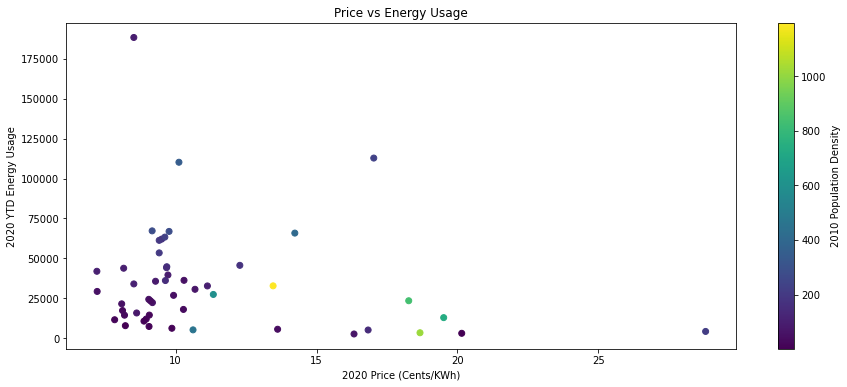

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(Elec_Pop_Taxes['2020 price'],Elec_Pop_Taxes['2020 so far sales'], c=Elec_Pop_Taxes['2010_DENSITY'])
clb = plt.colorbar()
plt.xlabel(f"2020 Price (Cents/KWh)")
plt.ylabel("2020 YTD Energy Usage")
clb.set_label('2010 Population Density')
plt.title("Price vs Energy Usage")
plt.show()
#plt.savefig("PricevsEnergy.png")

In [29]:
#Doing the visualization of regulated states vs unregulated price vs year
#grouping and averaging out the regulated vs deregulated states

#List of de-regulated: California, Connecticut, Delaware, Illinois, Massachusetts, Maryland, Maine, Michigan, Montana, New Hampshire, New Jersey, New York, Ohio, Pennsylvania, Rhode Island, and Texas. 
#List of regulated: Alabama, Alaska, Hawaii, Idaho, Mississippi, Minnesota, North Carolina, Wisconsin (All other states)

#de_reg_states = Elec_Pop_Taxes.loc[Elec_Pop_Taxes['State Abbreviation'].isin(['CA', 'CT', 'DE', 'IL', 'MA', 'MD', 'ME', 'MI', 'MT', 'NH', 'NJ', 'NY', 'OH', 'PA', 'RI', 'TX'])]

#reg_states = Elec_Pop_Taxes.loc[Elec_Pop_Taxes['State Abbreviation'].isin(['AL','AK','AZ','AR','CO','FL','GA','HI','ID','IN','IN','IA','KS','KY','LA','MN','MS','MO','NE','NV','NM','NC','ND','OK','OR','SC','SD','TN','UT','VT','VA','WA','WV','WI','WY'])]

de_reg_states.head(50)
#reg_states.head(50)


,State,State Abbreviation,State Tax Rate,Rank,Avg. Local Tax Rate (a),Combined Rate,Combined Rank,Max Local Tax Rate,Abbreviation_y,1910_POPULATION,...,2018 price,2017 price,2016 price,2015 price,2020 so far sales,2019 sales,2018 sales,2017 sales,2016 sales,2015 sales
4,California,CA,0.07250,1.0,0.0143,0.0868,8.0,0.02500,CA,2377549.0,...,16.58,16.06,15.23,15.42,112830.38146,247679.77249,255224.27196,257267.93701,256846.63497,261170.43698
6,Connecticut,CT,0.06350,12.0,0.0000,0.0635,33.0,0.00000,CT,1114756.0,...,18.41,17.55,17.24,17.77,12831.14497,27754.65181,28833.92499,28135.52999,28931.08701,29476.15502
7,Delaware,DE,0.00000,46.0,0.0000,0.0000,47.0,0.00000,DE,202322.0,...,10.55,10.90,11.09,11.17,5165.81757,11236.91617,11773.09999,11128.60301,11258.43802,11498.20500
13,Illinois,IL,0.06250,13.0,0.0255,0.0880,7.0,0.04750,IL,5638591.0,...,9.60,9.49,9.38,9.40,63292.87476,137196.06838,142654.80803,137196.31002,141050.40899,138619.97001
19,Maine,ME,0.05500,29.0,0.0000,0.0550,42.0,0.00000,ME,742371.0,...,13.44,13.02,12.80,12.78,5551.65072,11814.72440,12354.81901,11213.67400,11448.95100,11888.16799
20,Maryland,MD,0.06000,17.0,0.0000,0.0600,38.0,0.00000,MD,1295346.0,...,11.57,11.98,12.21,12.07,27356.55077,60588.21468,62086.45500,59303.88500,61353.91102,61781.71900
21,Massachusetts,MA,0.06250,13.0,0.0000,0.0625,35.0,0.00000,MA,3366416.0,...,18.50,17.12,16.48,16.90,23414.26280,50260.75254,53285.02904,52513.32103,53475.88800,54621.08801
22,Michigan,MI,0.06000,17.0,0.0000,0.0600,38.0,0.00000,MI,2810173.0,...,11.40,11.28,11.05,10.76,45600.83385,100377.32143,104869.49604,101899.09299,104467.81302,102479.92098
26,Montana,MT,0.00000,46.0,0.0000,0.0000,47.0,0.00000,MT,376053.0,...,8.84,8.92,8.84,8.90,7290.33778,15068.72642,14838.84500,14709.65601,14100.60104,14206.91101
29,New Hampshire,NH,0.00000,46.0,0.0000,0.0000,47.0,0.00000,NH,430572.0,...,17.01,16.17,15.66,16.02,5081.42597,10690.77890,11046.28399,10787.26100,10904.95602,10999.14903


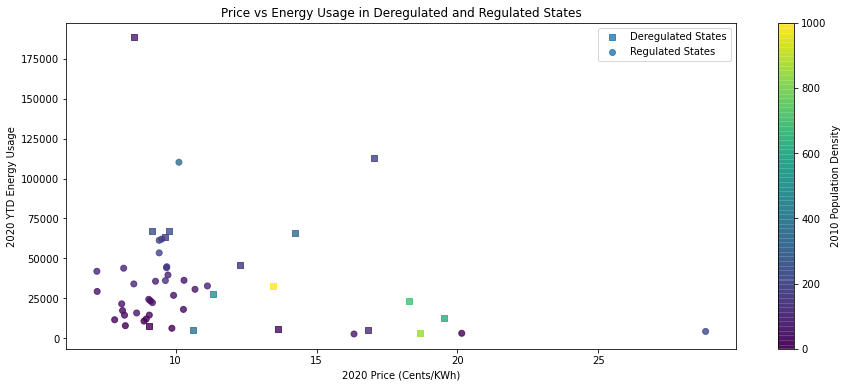

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize=(15,6))
plt.scatter(de_reg_states['2020 price'],de_reg_states['2020 so far sales'], c = de_reg_states['2010_DENSITY'], marker = 's', alpha = .8)
plt.scatter(reg_states['2020 price'],reg_states['2020 so far sales'], c = reg_states['2010_DENSITY'], alpha = .8)
clb = plt.colorbar()
plt.clim(0, 1000)
plt.xlabel(f"2020 Price (Cents/KWh)")
plt.ylabel("2020 YTD Energy Usage")
clb.set_label('2010 Population Density')
plt.title("Price vs Energy Usage in Deregulated and Regulated States")
plt.legend(['Deregulated States', 'Regulated States'])
plt.show()
plt.savefig("Price-Consumption_RegvsDe.png")

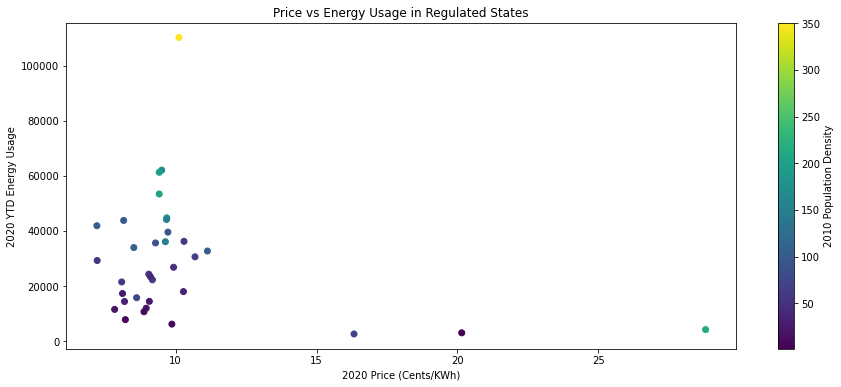

In [27]:
plt.figure(figsize=(15,6))
plt.scatter(reg_states['2020 price'],reg_states['2020 so far sales'], c=reg_states['2010_DENSITY'])
clb = plt.colorbar()
plt.xlabel(f"2020 Price (Cents/KWh)")
plt.ylabel("2020 YTD Energy Usage")
clb.set_label('2010 Population Density')
plt.title("Price vs Energy Usage in Regulated States")
plt.show()
#plt.savefig("PricevsEnergy.png")